# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button. Then continue scrolling until you cannot scroll anymore. The maximum number of images Google Images shows is 700.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

In [1]:
from fastai import *
from fastai.vision import *


Choose an appropriate name for your labeled images. You can run these steps multiple times to grab different labels.

In [13]:
path = Path('/Users/WayNoxchi/data/aircraft/')

In [14]:
url_files = []
for file in path.iterdir():
    if file.is_file() and file.suffix == '.txt':
        url_files.append(file)

In [15]:
url_files[:2]

[PosixPath('/Users/WayNoxchi/data/aircraft/urls_f4.txt'),
 PosixPath('/Users/WayNoxchi/data/aircraft/urls_mig25.txt')]

In [16]:
for url_file in url_files:
    folder = url_file.name.split('_')[-1].split('.')[0]
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)

Finally, upload your urls file. You just need to press Upload in your working directory and select your file, then click 'upload' on the right.

![](images/download_images/upload.png)

## Download images

Now you will need to download you images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename and the destination folder and this function will download and save all images than can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

In [19]:
url_files[:3]

[PosixPath('/Users/WayNoxchi/data/aircraft/urls_f4.txt'),
 PosixPath('/Users/WayNoxchi/data/aircraft/urls_mig25.txt'),
 PosixPath('/Users/WayNoxchi/data/aircraft/urls_mig31.txt')]

In [21]:
# %%time
# for url_file in url_files:
#     folder = url_file.name.split('_')[-1].split('.')[0]
#     dest = path/folder
#     download_images(url_file, dest, max_pics=1000)

In [22]:
def dl_url(idx=0):
    url_file = url_files[idx]
    folder = url_file.name.split('_')[-1].split('.')[0]
    dest = path/folder
    download_images(url_file, dest, max_pics=1000)

In [23]:
idx = 0
dl_url(idx)

In [24]:
idx = 1
dl_url(idx)

Error https://www.flightglobalimages.com/w/241/mikoyan-mig-25-foxbat-cutaway-poster-1569689.jpg 'content-length'
Error https://militarymachine.com/wp-content/uploads/2016/11/Z-Mig31.jpg 'content-length'
Error https://c8.alamy.com/comp/E1N0M3/mig-mig-25-foxbat-E1N0M3.jpg 'content-length'
Error https://www.team-bhp.com/forum/attachments/commercial-vehicles/1385231d1435066908-indian-aviation-mig-25-foxbat-indian-air-force-13-sr71.jpeg 'content-length'
Error https://c8.alamy.com/comp/FK141J/monino-moscow-region-russia-october-8-mig-25-rb-rekonnaissance-bomber1964maxspeedkmh-FK141J.jpg 'content-length'
Error https://cdn.planespotters.net/photo/266000/original/994-libya-air-force-mikoyan-gurevich-mig-25-foxbat_PlanespottersNet_266055_db3a446f1b.jpg 'content-length'
Error http://www.migflug.com/jetflights/wp-content/uploads/2016/09/MiG-25-Foxbat-Flight-in-Russia-672x372.jpg 'content-length'
Error https://nebula.wsimg.com/256c91096d904e75e2ba710eac43856e?AccessKeyId=FE93D23516A937348330&dispos

In [25]:
idx = 2
dl_url(idx)

Error https://nedaa-sy.com/storage/news_images/8497/gVbvaKBLzBcRwo1GNGqac350DlN5xlq3EAQ8Hvv0.jpeg?w=720&h=405 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=10156834619993521 'content-length'
Error https://images3.sw-cdn.net/product/picture/710x528_15819197_2580448_1479748408.jpg 'content-length'
Error https://imgproc.airliners.net/photos/airliners/8/9/8/1509898.jpg?v=v40 'content-length'
Error https://cdn.planespotters.net/photo/822000/original/96-russian-federation-air-force-mikoyan-gurevich-mig-31-foxhound_PlanespottersNet_822943_d5cd095bbd.jpg 'content-length'
Error http://www.migflug.com/jetflights/wp-content/uploads/2014/07/1537018.jpg 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=1934296500215465 'content-length'
Error https://images3.sw-cdn.net/product/picture/710x528_7002222_2987623_1459320335.jpg 'content-length'
Error https://imgproc.airliners.net/photos/airliners/4/0/7/1032704.jpg?v=v40 'content-le

In [ ]:
idx = 3
dl_url(idx)

In [27]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F06%2Fkhadh515.jpg%3Fquality%3D85 'content-length'
Error https://i2.wp.com/www.updatemilitary.com/wp-content/uploads/2017/12/Screenshot_1.png?resize=669%2C338 'content-length'
Error https://imgproc.airliners.net/photos/airliners/0/1/4/1711410.jpg?v=v40 'content-length'
Error http://c8.alamy.com/comp/M9DA9M/an-air-force-f-15e-strike-eagle-fighter-jet-on-a-runway-at-moody-afb-this-f-15e-belongs-to-the-4th-fighter-wing-from-seymour-johnson-air-force-base-M9DA9M.jpg 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=60&url=http%3A%2F%2Fd254andzyoxz3f.cloudfront.net%2F7049055165_e8ca7ccfb8_o.jpg 'content-length'
Error http://c8.alamy.com/comp/M9DAAF/an-air-force-f-15e-strike-eagle-fighter-jet-on-a-runway-at-moody-afb-this-f-15e-belongs-to-the-4th-fighter-wing-from-seymour-johnson-air-force-base-M9DAAF.jpg 'content-length'
Error https://www.maxpix

In [28]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error https://www.maxpixel.net/static/photo/1x/Transport-Military-Cargo-Aircraft-Aircraft-Cargo-62880.jpg 'content-length'
Error https://c8.alamy.com/comp/C50F47/the-brand-new-airbus-a400m-military-cargo-aircraft-C50F47.jpg 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=60&url=https%3A%2F%2Fs3.amazonaws.com%2Fthe-drive-staging%2Fmessage-editor%252F1496272125691-080908-f-9292m-077.jpg 'content-length'
Error https://c8.alamy.com/comp/G4E59M/airbus-defence-and-space-a400m-military-cargo-aircraft-at-the-farnborough-G4E59M.jpg 'content-length'
Error https://img.gawkerassets.com/img/19893m7fd927jjpg/original.jpg HTTPSConnectionPool(host='img.gawkerassets.com', port=443): Max retries exceeded with url: /img/19893m7fd927jjpg/original.jpg (Caused by SSLError(SSLCertVerificationError("hostname 'img.gawkerassets.com' doesn't match either of 'univision.map.fastly.net', '*.avclub.com', '*.blogs.univision.com', '*.causeandeffect.fm', '*.cink.hu', '*.clickhole.com', '*.dead

Process ForkProcess-75:
Process ForkProcess-76:
Process ForkProcess-80:
Process ForkProcess-77:
Process ForkProcess-73:
Process ForkProcess-74:
Process ForkProcess-79:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multi

KeyboardInterrupt: 

In [29]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F03%2Fmnnnhjjf.jpg%3Fquality%3D85 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F06%2Fkhadh515.jpg%3Fquality%3D85 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2018%2F03%2Fjajd91711.jpg%3Fquality%3D85 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2018%2F06%2Fjajdja1911.jpg%3Fquality%3D85 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=60&url=https%3A%2F%2Fs3.amazonaws.com%2Fthe-drive-staging%2Fmessage-editor%252F1532544065145-jjajjad1x.jpg 'content-length'
Error https://militarymachine.com/wp-content/uploads/2017/04/F-15-aircraft-prepares-for-take-off.jpg 'content-length

In [30]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/HRZ_MiG_21.jpg/1200px-HRZ_MiG_21.jpg 'content-length'


Error https://militarymachine.com/wp-content/uploads/2017/04/Mig-21.jpg 'content-length'
Error https://images1.sw-cdn.net/product/picture/710x528_20652350_11786686_1509654234.jpg 'content-length'
Error https://imgproc.airliners.net/photos/airliners/1/7/2/4211271.jpg?v=v432f4fc4da5 'content-length'
Error http://www.balkaninsight.com/en/file/show//Images/Images.New/640%20mig21.jpg 'content-length'
Error https://c8.alamy.com/comp/D2AKTN/mig-21-D2AKTN.jpg 'content-length'
Error https://www.fsx-download.com/thumbs/w800/src/images/cfs12.jpg 'content-length'
Error http://dioramas-and-models.com/____impro/1/onewebmedia/SAM_2552a%20%E2%80%93%20Kopi.JPG?etag=W%2F%22293a3-583424f7%22&sourceContentType=image%2Fjpeg&ignoreAspectRatio&resize=948%2B483&extract=0%2B0%2B948%2B483&quality=85 'content-length'
Error https://c8.alamy.com/comp/DJHDP3/mig-21-fishbed-DJHDP3.jpg 'content-length'
Error https://militarymachine.com/wp-content/uploads/2016/11/Mikoyan-Gurevich-MiG-21-Military-Machine.gif 'content-l

In [31]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F05%2Fa-10.jpg%3Fquality%3D85 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=60&url=http%3A%2F%2Fd254andzyoxz3f.cloudfront.net%2Frc-rcp_8669.jpg 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=60&url=https%3A%2F%2Fs3.amazonaws.com%2Fthe-drive-staging%2Fmessage-editor%252F1502229332411-a-10-diverter.jpg 'content-length'
Error https://c8.alamy.com/comp/D6TTXR/82649-a10-thunderbolt-warthog-tankbuster-flying-at-iat-fairford-D6TTXR.jpg 'content-length'
Error https://www.wallpapersbrowse.com/images/z7/z7ba8jo.jpg 'content-length'
Error https://www.maxpixel.net/static/photo/1x/Thunderbolt-Military-Aircraft-Aircraft-A10-Warthog-597930.jpg 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=60&url=https%3A%2F%2Fs3.amazonaws.com%2Fthe-drive-staging%2Fmessage-editor%252F1502228748300-051123-f-1234p-06

In [32]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2018%2F07%2Fjjadj11.jpg%3Fquality%3D85 'content-length'
Error https://cdn.planespotters.net/photo/727000/original/2013-plaaf-china-air-force-chengdu-j-20_PlanespottersNet_727092_3c44a28bbb.jpg 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F02%2Fhc.jpg%3Fquality%3D85 'content-length'
Error http://huayuncp03.china.com/650x0/201703/10/ab9f4130-51d7-0651-f352-faf8e9809a0b.jpg 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=60&url=https%3A%2F%2Fs3.amazonaws.com%2Fthe-drive-staging%2Fmessage-editor%252F1487786424390-hdh1.jpg 'content-length'
Error https://en.dailypakistan.com.pk/wp-content/uploads/2016/10/e2-9.jpg 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=60&url=https%3A%2F%2Fs3.amazonaws.com%2Fthe-drive-staging%2Fmessage-edi

In [33]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error https://militarymachine.com/wp-content/uploads/2017/12/Captivating-Images-of-Panavia-Tornado-in-flight.jpg 'content-length'
Error https://c8.alamy.com/comp/PGM695/panavia-tornado-ids-zh917-royal-saudi-air-force-bae-warton-test-pilots-fly-through-the-mach-loop-lfa7-wales-PGM695.jpg 'content-length'
Error http://www.cambrianflyingschool.co.uk/wp-content/uploads/2018/01/Tornado.jpg 'content-length'
Error https://www.rafmuseumshop.com/pub/media/catalog/product/cache/image/560x560/e9c3970ab036de70892d86c6d221abfe/m/d/md-aa39807-cg.jpg HTTPSConnectionPool(host='www.rafmuseumshop.com', port=443): Max retries exceeded with url: /pub/media/catalog/product/cache/image/560x560/e9c3970ab036de70892d86c6d221abfe/m/d/md-aa39807-cg.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')])")))
Error https://imgproc.airliners.net/photos/airliners/3/7/1/1413173.jpg?v=v40 'content-length'
Error https://www.flightglobalimage

In [34]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error https://www.baesystems.com/en/download-en/multimediaimage/webImage/20170811161356/1434598974803.jpg 'content-length'


Error https://www.baesystems.com/en/download-en/multimediaimage/webImage/20170811161356/1434598974803.jpg 'content-length'
Error https://www.baesystems.com/en/download-en/multimediaimage/webImage/20170807161414/1434584790672.jpg 'content-length'
Error http://home.bt.com/images/eurofighter-typhoon-136424730324102601-180131112505.jpg 'content-length'
Error https://www.thenational.ae/image/policy:1.123852:1499271627/image/jpeg.jpg?f=16x9&w=1200&$p$f$w=dfa40e8 'content-length'
Error http://www.migflug.com/jetflights/wp-content/uploads/2014/05/eurofighter-typhoon-over-abu-dhabi-1274.jpg 'content-length'
Error https://www.thenational.ae/image/policy:1.684041:1513148980/06375923.jpg?f=16x9&w=1200&$p$f$w=2af6a60 'content-length'
Error https://images.financialexpress.com/2016/11/flight.jpg 'content-length'
Error https://www.thenational.ae/image/policy:1.711685:1532362819/Eurofighter-Typhoon.JPG?f=16x9&w=1200&$p$f$w=7767292 'content-length'
Error https://cdn.presstv.com/photo/20180213/8cf00510-d

In [35]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error https://img.newatlas.com/f-16v-0.jpg?auto=format%2Ccompress&ch=Width%2CDPR&crop=entropy&fit=crop&h=347&q=60&w=616&s=18327e0d772c92d8c7ae9ed47f5b5fa2 'content-length'
Error https://fightersweep.com/wp-content/uploads/2018/02/F-16-Fighting-Falcon-pilot-and-crew-chief-communicate-while-preparing-for-a-flight-during-the-2015-Heritage-Flight-Training-and-Certification-Course-at-Davis-Monthan-Air-F.jpg 'content-length'
Error http://c8.alamy.com/comp/M9DAAY/an-air-force-f-16-viper-fighting-falcon-on-a-runway-at-moody-afb-the-block-52-f-16cd-belongs-to-the-south-carolina-air-national-guard-169th-fw-M9DAAY.jpg 'content-length'
Error http://www.wallpapers13.com/wp-content/uploads/2016/04/F-16-Fighting-Falcon-is-an-engine-multirole-fighter-aircraft-originally-developed-by-General-Dynamics-now-Lockheed-Martin-Designed-as-an-air-superiority-day-fighter-a-successful-all-weather-915x515.jpg 'content-length'
Error https://s.uvlist.net/2355/screenshot/F-16%20Combat%20Pilot%20(Amiga%20OCS).jpg 'co

In [36]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error https://c8.alamy.com/comp/ADBYPR/grumman-f-14-tomcat-fighter-aircraft-at-naval-air-station-wildwood-ADBYPR.jpg 'content-length'
Error https://c8.alamy.com/comp/CWC57J/f-14-tomcat-fighter-climbs-with-its-afterburners-ignited-during-a-CWC57J.jpg 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=60&url=https%3A%2F%2Fs3.amazonaws.com%2Fthe-drive-staging%2Fmessage-editor%252F1493062033618-fhh32.jpg 'content-length'
Error http://263i3m2dw9nnf6zqv39ktpr1.wpengine.netdna-cdn.com/wp-content/uploads/2018/01/Top-gun-960_640.jpg 'content-length'
Error https://c8.alamy.com/comp/JN2DR9/a-navy-grumman-f-14-tomcat-on-the-flight-deck-of-uss-midway-san-diego-JN2DR9.jpg 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F04%2Fkhdkahf62.jpg%3Fquality%3D85 'content-length'
Error http://www.migflug.com/jetflights/wp-content/uploads/2015/11/Blue-Angels-FA-18.jpg 'content-length'
Error http:

In [37]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error https://cdn.wonderfulengineering.com/wp-content/uploads/2014/03/JAS_39_gripen-5.jpg HTTPSConnectionPool(host='cdn.wonderfulengineering.com', port=443): Max retries exceeded with url: /wp-content/uploads/2014/03/JAS_39_gripen-5.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')])")))
Error https://www.flightglobal.com/assets/getasset.aspx?itemid=69843 'content-length'
Error https://cdn.wonderfulengineering.com/wp-content/uploads/2014/03/JAS_39_gripen-3.jpg HTTPSConnectionPool(host='cdn.wonderfulengineering.com', port=443): Max retries exceeded with url: /wp-content/uploads/2014/03/JAS_39_gripen-3.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')])")))
Error https://cdn.wonderfulengineering.com/wp-content/uploads/2014/03/JAS_39_gripen-6.jpg HTTPSConnectionPool(host='cdn.wonderfulengineering.com', port=443): Max retries 

In [38]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2018%2F05%2Fblockiii-1.jpg%3Fquality%3D85 'content-length'
Error https://cdn.presstv.com/photo/20161204/218de7c2-110f-4c47-a970-13650662768d.jpg 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=60&url=https%3A%2F%2Fs3.amazonaws.com%2Fthe-drive-staging%2Fmessage-editor%252F1527110641985-blockiii-3.jpg 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=60&url=https%3A%2F%2Fs3.amazonaws.com%2Fthe-drive-staging%2Fmessage-editor%252F1520368854067-fa-18c-4.jpg 'content-length'
Error https://ukdj.imgix.net/2017/12/F-18F_refueling_F-18E-e1505286062650.jpg?auto=compress%2Cformat&fit=crop&h=580&ixlib=php-1.2.1&q=80&w=1021&wpsize=td_1021x580&s=0eb67e15d71036b6a3c05c9dcb547b41 'content-length'
Error https://s3.reutersmedia.net/resources/r/?m=02&d=20161204&t=2&i=1164085542&r=LYNXMPECB305P&w=1280 'content-length'
Error https://www.milit

In [39]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F12%2Ff-22.jpg%3Fquality%3D85 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2018%2F07%2Fjjjaj2131.jpg%3Fquality%3D85 'content-length'
Error https://c8.alamy.com/comp/K8RR9W/usaf-f22-raptor-K8RR9W.jpg 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=60&url=https%3A%2F%2Fs3.amazonaws.com%2Fthe-drive-staging%2Fmessage-editor%252F1513303510324-f-22-3.jpg 'content-length'
Error http://www.migflug.com/jetflights/wp-content/uploads/2014/05/f-22-raptor.jpg 'content-length'
Error https://c8.alamy.com/comp/C3MP3P/a-lockheed-martin-f22-raptor-fighter-of-the-usaf-C3MP3P.jpg 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F08%2Ff-22-1.jpg%3Fquality%3D85 'content-length'
Err

Process ForkProcess-168:
Process ForkProcess-165:
Process ForkProcess-167:
Process ForkProcess-163:
Process ForkProcess-164:
Process ForkProcess-161:
Process ForkProcess-166:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.

KeyboardInterrupt: 

In [40]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error https://www.arconic.com/global/en/what-we-do/images/f35-jsf.jpg HTTPSConnectionPool(host='www.arconic.com', port=443): Max retries exceeded with url: /global/en/what-we-do/images/f35-jsf.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')])")))
Error https://img.gawkerassets.com/img/19env39elzwsbjpg/original.jpg HTTPSConnectionPool(host='img.gawkerassets.com', port=443): Max retries exceeded with url: /img/19env39elzwsbjpg/original.jpg (Caused by SSLError(SSLCertVerificationError("hostname 'img.gawkerassets.com' doesn't match either of 'univision.map.fastly.net', '*.avclub.com', '*.blogs.univision.com', '*.causeandeffect.fm', '*.cink.hu', '*.clickhole.com', '*.deadspin.com', '*.earther.com', '*.gizmodo.com', '*.gizmodo.es', '*.gizmodo.in', '*.io9.com', '*.jalopnik.com', '*.jezebel.com', '*.kinja-embeds.com', '*.kinja-img.com', '*.kinja-labs.com', '*.kinja-static.com', '*.kinja.com', '*.kotaku.com', '

Process ForkProcess-175:
Process ForkProcess-176:
Process ForkProcess-172:
Process ForkProcess-173:
Process ForkProcess-170:
Process ForkProcess-169:
Process ForkProcess-171:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.

KeyboardInterrupt: 

In [41]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2018%2F07%2Fjjjjalc1.jpg%3Fquality%3D85 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2018%2F04%2Fkakd01313.jpg%3Fquality%3D85 'content-length'
Error https://cdn.presstv.com/photo/20180527/2f649c01-7c31-4c46-b1d0-ece2b4b49904.jpg 'content-length'
Error https://www.graphicnews.com/links/gn_swf/swf-36000-36499/GN36269R_EN/GN36269-Artboard_1.png 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=60&url=https%3A%2F%2Fs3.amazonaws.com%2Fthe-drive-staging%2Fmessage-editor%252F1531921523005-su-50s.jpg 'content-length'
Error https://steemitimages.com/0x0/http://www.f-16.net/forum/download/file.php?id=21845&mode=view 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=10156165230873604 'content-length'
Error http://imagesvc.timeincapp.c

Process ForkProcess-182:
Process ForkProcess-177:
Process ForkProcess-183:
Process ForkProcess-180:
Process ForkProcess-178:
Process ForkProcess-179:
Process ForkProcess-181:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.

KeyboardInterrupt: 

In [43]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error https://cbsnews1.cbsistatic.com/hub/i/r/2017/07/31/2c5305ee-9163-4463-b929-82bc7ff79cdc/resize/620x465/e3394c509db88f946997b23ae77c5824/su-30-tarmac.jpg 'content-length'
Error http://dioramas-and-models.com/____impro/1/onewebmedia/Su%2030%20SAM_4131%20(2).jpg?etag=%22ce02-53bb1830%22&sourceContentType=image%2Fjpeg&ignoreAspectRatio&resize=948%2B759&extract=0%2B0%2B948%2B752&quality=85 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=60&url=https%3A%2F%2Fs3.amazonaws.com%2Fthe-drive-staging%2Fmessage-editor%252F1525339289705-ajajjd01.jpg 'content-length'
Error https://images.financialexpress.com/2017/04/BRAHMOS-Air-Version-with-Su30-3-1.jpg 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2018%2F01%2Fsu-30-road-1.jpg%3Fquality%3D85 'content-length'
Error https://imgproc.airliners.net/photos/airliners/7/1/9/1256917.jpg?v=v40 'content-length'
Error http://dioramas-and-model

In [45]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error https://c8.alamy.com/comp/B92WFN/su-24-fencer-memorial-warplane-parked-on-the-territory-of-the-sukhoi-B92WFN.jpg 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=1497511147203699 'content-length'
Error https://c8.alamy.com/comp/HEK0KX/an-underside-view-of-a-soviet-su-24-fencer-aircraft-su-24-fencer-underside-HEK0KX.jpg 'content-length'
Error https://c7.alamy.com/comp/C3G7AW/military-jet-bomber-su-24-fencer-on-take-off-and-landing-C3G7AW.jpg 'content-length'
Error https://c8.alamy.com/comp/XD05A5/su-24-fencer-XD05A5.jpg 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=1607925296162283 'content-length'
Error http://www.jf18-resource.com/pTSH/AI_Aircraft/RR/Su24/Haco_RR_Su24_LR_s.jpg 'content-length'
Error https://fscomps.fotosearch.com/compc/OMU/OMU111/su-24-fencer-clipart__02p0344.jpg 'content-length'
Error https://c8.alamy.com/comp/EK3A09/leningrad-region-russia-sukhoi-su-24-fencer-attack-aircraft-EK3A09.jpg 

Process ForkProcess-200:
Process ForkProcess-199:
Process ForkProcess-196:
Process ForkProcess-198:
Process ForkProcess-195:
Process ForkProcess-194:
Process ForkProcess-193:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.

KeyboardInterrupt: 

In [46]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2018%2F04%2Fahd81414.jpg%3Fquality%3D85 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=60&url=https%3A%2F%2Fs3.amazonaws.com%2Fthe-drive-staging%2Fmessage-editor%252F1523696941782-jdajdb9114.jpg 'content-length'
Error https://imgproc.airliners.net/photos/airliners/7/9/2/1300297.jpg?v=v40 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2018%2F03%2Ffa-18c.jpg%3Fquality%3D85 'content-length'
Error https://imgproc.airliners.net/photos/airliners/8/2/0/1151028.jpg?v=v40 'content-length'
Error https://c8.alamy.com/comp/D4T5HX/an-fa-18c-hornet-taking-off-from-the-flight-deck-of-uss-dwight-d-eisenhowe-D4T5HX.jpg 'content-length'
Error https://c8.alamy.com/comp/E69P6B/swiss-air-force-fa-18c-hornet-at-the-royal-international-air-tattoo-E69P6B.jpg 'content-length'
Error

In [47]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error https://imgproc.airliners.net/photos/airliners/1/8/8/2237881.jpg?v=v40 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=http%3A%2F%2Fd254andzyoxz3f.cloudfront.net%2F13735040_636982793137958_655616273601117150_oa.jpg 'content-length'
Error https://ukdj.imgix.net/2017/12/Sukhoi_Su-25_of_the_Russian_Air_Force_landing_at_Vladivostok_8683076150.jpg?auto=compress%2Cformat&fit=crop&h=580&ixlib=php-1.2.1&q=80&w=1021&wpsize=td_1021x580&s=b4793911d8adb5b32368567485de161b 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=60&url=https%3A%2F%2Fs3.amazonaws.com%2Fthe-drive-staging%2Fmessage-editor%252F1517673489849-jaja2411.jpg 'content-length'
Error https://images2.sw-cdn.net/product/picture/710x528_15819132_8063938_1479396470.jpg 'content-length'
Error https://c8.alamy.com/comp/B93YDJ/a-sukhoi-su-25-t-frogfoot-ground-attack-jet-B93YDJ.jpg 'content-length'
Error http://gallery.myff.org/gallery/278435/czech_1.jpg 'content-length'
E

In [48]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error http://www.migflug.com/jetflights/wp-content/uploads/2012/09/Su-30-and-F-15-672x372.jpg 'content-length'
Error https://voiceofpeopletoday.com/wp-content/uploads/2017/06/Su-27-Screen_141020_173500.jpg_Thumbnail0.jpg 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F06%2Fkdhah526255.jpg%3Fquality%3D85 'content-length'
Error https://s4.reutersmedia.net/resources/r/?m=02&d=20181016&t=2&i=1315369157&w=1200&r=LYNXNPEE9F1DY 'content-length'
Error https://www.team-bhp.com/forum/attachments/commercial-vehicles/1420299d1443363953-sukhoi-su-27-flanker-russias-eagle-killer-su30_bombs.jpg 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=148983321782567 'content-length'
Error https://s3.reutersmedia.net/resources/r/?m=02&d=20181016&t=2&i=1315426933&r=LYNXNPEE9F1NM 'content-length'
Error x-raw-image:///03c09760d99a898e918403ca78ccd53142fffbdbbea681b14371916da74605ef No

Process ForkProcess-221:
Process ForkProcess-222:
Process ForkProcess-223:
Process ForkProcess-224:
Process ForkProcess-217:
Process ForkProcess-218:
Process ForkProcess-219:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.

KeyboardInterrupt: 

In [49]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error https://d.ibtimes.co.uk/en/full/1399237/france-rafale-fighter-jet-isis-isil.jpg?w=720&e=5ffe07c5e869d6945e3f857def7be8a0 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=1381480315213813 'content-length'
Error https://images.financialexpress.com/2016/09/rafale-reuters.jpg 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=1386817728013405 'content-length'
Error http://bsmedia.business-standard.com/_media/bs/img/article/2017-11/18/full/1510979084-6107.png 'content-length'
Error https://s4.reutersmedia.net/resources/r/?m=02&d=20170322&t=2&i=1177536668&r=LYNXMPED2L0QV&w=1280 'content-length'
Error https://resize.indiatvnews.com/en/centered/newbucket/715_431/2016/12/rafelplanes-1481390515.jpg 'content-length'
Error https://c8.alamy.com/comp/PB5E3K/french-rafale-fighter-jet-displaying-at-the-royal-international-air-tattoo-in-july-2018-PB5E3K.jpg 'content-length'
Error https://www.thenational.ae/image/policy:1.669837

Process ForkProcess-232:
Process ForkProcess-229:
Process ForkProcess-228:
Process ForkProcess-227:
Process ForkProcess-226:
Process ForkProcess-225:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    s

KeyboardInterrupt: 

In [50]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2018%2F03%2Ff-16-f-35.jpg%3Fquality%3D85 'content-length'
Error http://331mrnu3ylm2k3db3s1xd1hg-wpengine.netdna-ssl.com/wp-content/uploads/2017/08/coffee-jet-1200x800.jpg 'content-length'
Error https://fm.cnbc.com/applications/cnbc.com/resources/img/editorial/2018/08/21/105407621-1534843362562kowsar.600x337.png?v=1534948184 'content-length'
Error https://en.dailypakistan.com.pk/wp-content/uploads/2018/08/DlhxPGSUYAAxoK5.jpg 'content-length'
Error http://img5.cna.com.tw/Eng/WebEngPhotos//CEP/20181020/201810200020t0001.jpg 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2018%2F10%2Fadadad11c.jpg%3Fquality%3D85 'content-length'
Error https://cdn.presstv.com/photo/20180429/8b1896b3-3cba-4af0-b2ee-df1ae939286c.jpg 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70

In [51]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2018%2F07%2Fsu-22.jpg%3Fquality%3D85 'content-length'
Error https://c8.alamy.com/comp/HG3Y0X/polish-air-force-sukhoi-su-22-fitter-bomber-jet-HG3Y0X.jpg 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F06%2Fkhadhah5251.jpg%3Fquality%3D85 'content-length'
Error https://c8.alamy.com/comp/D4WT5Y/polish-air-force-su-22-fitter-aircraft-with-flamboyant-nose-art-at-D4WT5Y.jpg 'content-length'
Error https://static1.bigstockphoto.com/2/8/1/large1500/182400739.jpg 'content-length'
Error https://c8.alamy.com/comp/FWMBE2/sukhoi-su-22-fitter-is-a-soviet-fighter-bomber-aircraft-operated-by-FWMBE2.jpg 'content-length'
Error http://kenny22.com/wp-content/uploads/2018/04/su-17-28.jpg 'content-length'
Error https://c8.alamy.com/comp/F55PMR/polish-air-force-sukhoi-su-22-fighter-jet-on-display-at-th

In [52]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error http://www.migflug.com/jetflights/wp-content/uploads/2014/01/German-MiG-29A-Fulcrum.jpg 'content-length'
Error https://www.team-bhp.com/forum/attachments/commercial-vehicles/1401417d1439065807t-mig-29-fulcrum-balance-rests-us-planview_mig29m.jpg 'content-length'
Error https://www.team-bhp.com/forum/attachments/commercial-vehicles/1401443d1439068140t-mig-29-fulcrum-balance-rests-us-735560_4293583465948_1532412940_o.jpg 'content-length'
Error http://www.migflug.com/jetflights/wp-content/uploads/2014/01/MiG-29-Fulcrum-Farewell-USA-2003.jpg 'content-length'
Error https://cdn.planespotters.net/photo/787000/original/70-polish-air-force-mikoyan-gurevich-mig-29-fulcrum-a_PlanespottersNet_787189_e612696c0d.jpg 'content-length'
Error https://www.team-bhp.com/forum/attachments/commercial-vehicles/1403661d1439493523t-mig-29-fulcrum-balance-rests-us-mig29_afterburners_16.jpg 'content-length'
Error http://www.migflug.com/jetflights/wp-content/uploads/2016/07/MiG-29-Luftstreitkr%C3%A4fte-der-NV

In [53]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

Error https://www.strategic-culture.org/images/news/2016/08/15/or-37760.jpg 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=1310989695597522 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2018%2F01%2Fsu-30-road-1.jpg%3Fquality%3D85 'content-length'
Error https://imgproc.airliners.net/photos/airliners/2/5/3/1506352.jpg?v=v40 'content-length'
Error https://c8.alamy.com/comp/F2CNYA/sukhoi-su-34-fullback-at-maks-2015-air-show-in-moscow-russia-F2CNYA.jpg 'content-length'
Error https://imgproc.airliners.net/photos/airliners/4/4/1/2222144.jpg?v=v40 'content-length'
Error https://imgproc.airliners.net/photos/airliners/1/1/6/2152611.jpg?v=v40 'content-length'
Error https://c8.alamy.com/comp/M7HEXP/su-34-attack-aircraft-of-the-russian-air-force-M7HEXP.jpg 'content-length'
Error http://siberiantimes.com/upload/information_system_52/1/0/5/item_1050/information_items_1050.jpg

Process ForkProcess-262:
Process ForkProcess-264:
Process ForkProcess-260:
Process ForkProcess-261:
Process ForkProcess-257:
Process ForkProcess-258:
Process ForkProcess-259:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.

KeyboardInterrupt: 

In [54]:
if idx < len(url_files) - 1:
    idx += 1
    dl_url(idx)

In [55]:
idx

27

In [26]:
len(url_files)

28

Good! Let's take a look at some of our pictures then.

In [56]:
classes = [f.name for f in path.iterdir() if f.is_dir()]

In [58]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

f16


cannot identify image file '/Users/WayNoxchi/data/aircraft/f16/00000560.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f16/00000170.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f16/00000367.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f16/00000412.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f16/00000439.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f16/00000149.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f16/00000488.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f16/00000448.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f16/00000138.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f16/00000299.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f16/00000465.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f16/00000472.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f16/00000248.jpg'

cannot identify image file '/Users/WayNoxchi/data/aircraft/su24/00000213.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su24/00000361.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su24/00000073.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su24/00000058.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su24/00000061.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su24/00000328.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su24/00000100.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su24/00000076.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su24/00000467.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su24/00000041.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su24/00000453.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su24/00000283.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su24/

cannot identify image file '/Users/WayNoxchi/data/aircraft/mig29/00000359.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig29/00000163.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig29/00000411.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig29/00000570.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig29/00000460.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig29/00000058.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig29/00000070.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig29/00000277.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig29/00000244.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig29/00000457.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig29/00000084.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig29/00000494.jpg'
cannot identify image file '/Users/WayNoxchi/data/ai

cannot identify image file '/Users/WayNoxchi/data/aircraft/su22/00000417.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su22/00000377.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su22/00000411.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su22/00000264.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su22/00000504.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su22/00000263.jpg'


/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


cannot identify image file '/Users/WayNoxchi/data/aircraft/su22/00000278.jpg'
su25


cannot identify image file '/Users/WayNoxchi/data/aircraft/su25/00000171.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su25/00000377.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su25/00000407.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su25/00000111.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su25/00000471.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su25/00000276.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su25/00000328.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su25/00000506.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su25/00000250.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su25/00000243.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su25/00000151.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su25/00000347.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su25/

cannot identify image file '/Users/WayNoxchi/data/aircraft/mig21/00000400.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig21/00000017.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig21/00000000.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig21/00000264.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig21/00000273.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig21/00000277.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig21/00000279.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig21/00000244.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig21/00000443.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig21/00000319.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig21/00000125.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig21/00000051.jpg'
cannot identify image file '/Users/WayNoxchi/data/ai

cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18ef/00000228.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18ef/00000316.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18ef/00000292.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18ef/00000120.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18ef/00000490.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18ef/00000027.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18ef/00000432.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18ef/00000380.jpg'
f4


cannot identify image file '/Users/WayNoxchi/data/aircraft/f4/00000372.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f4/00000201.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f4/00000388.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f4/00000105.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f4/00000501.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f4/00000075.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f4/00000289.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f4/00000466.jpg'


/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


cannot identify image file '/Users/WayNoxchi/data/aircraft/f4/00000249.jpg'


/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


cannot identify image file '/Users/WayNoxchi/data/aircraft/f4/00000456.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f4/00000091.jpg'


/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


cannot identify image file '/Users/WayNoxchi/data/aircraft/f4/00000086.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f4/00000135.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f4/00000321.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f4/00000434.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f4/00000352.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f4/00000146.jpg'


/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


cannot identify image file '/Users/WayNoxchi/data/aircraft/f4/00000369.jpg'


/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


cannot identify image file '/Users/WayNoxchi/data/aircraft/f4/00000235.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f4/00000586.jpg'
a10


cannot identify image file '/Users/WayNoxchi/data/aircraft/a10/00000203.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/a10/00000258.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/a10/00000443.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/a10/00000050.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/a10/00000479.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/a10/00000309.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/a10/00000143.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/a10/00000034.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/a10/00000357.jpg'
cargo


cannot identify image file '/Users/WayNoxchi/data/aircraft/cargo/00000198.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/cargo/00000205.jpg'


/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file '/Users/WayNoxchi/data/aircraft/cargo/00000016.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/cargo/00000217.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/cargo/00000311.jpg'


/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:771: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


cannot identify image file '/Users/WayNoxchi/data/aircraft/cargo/00000470.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/cargo/00000248.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/cargo/00000301.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/cargo/00000481.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/cargo/00000292.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/cargo/00000133.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/cargo/00000455.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/cargo/00000291.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/cargo/00000232.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/cargo/00000150.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/cargo/00000178.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/cargo/00000344.jpg'
cannot identify image file '/Users/WayNoxchi/data/ai

cannot identify image file '/Users/WayNoxchi/data/aircraft/f15e/00000371.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f15e/00000228.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f15e/00000388.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f15e/00000474.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f15e/00000495.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f15e/00000293.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f15e/00000484.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f15e/00000254.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f15e/00000352.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f15e/00000343.jpg'
fighters


cannot identify image file '/Users/WayNoxchi/data/aircraft/fighters/00000400.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fighters/00000164.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fighters/00000213.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fighters/00000005.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fighters/00000167.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fighters/00000562.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fighters/00000214.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fighters/00000413.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fighters/00000405.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fighters/00000215.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fighters/00000607.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fighters/00000070.jpg'
cannot identify 

cannot identify image file '/Users/WayNoxchi/data/aircraft/f15c/00000401.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f15c/00000403.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f15c/00000238.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f15c/00000012.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f15c/00000364.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f15c/00000439.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f15c/00000463.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f15c/00000271.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f15c/00000312.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f15c/00000115.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f15c/00000472.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f15c/00000293.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f15c/

cannot identify image file '/Users/WayNoxchi/data/aircraft/typhoon/00000206.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/typhoon/00000012.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/typhoon/00000412.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/typhoon/00000377.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/typhoon/00000407.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/typhoon/00000203.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/typhoon/00000058.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/typhoon/00000277.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/typhoon/00000128.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/typhoon/00000262.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/typhoon/00000494.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/typhoon/00000482.jpg'
cannot identify image file '

cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18c/00000212.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18c/00000365.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18c/00000201.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18c/00000348.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18c/00000214.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18c/00000202.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18c/00000413.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18c/00000404.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18c/00000304.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18c/00000074.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18c/00000119.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18c/00000087.jpg'
cannot identify image file '/Users/WayNoxchi/data/ai

/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 16777218 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536000 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:771: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 2. 
  warnings.warn(str(msg))


cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18c/00000584.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18c/00000552.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18c/00000396.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18c/00000430.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/fa18c/00000021.jpg'
f35


cannot identify image file '/Users/WayNoxchi/data/aircraft/f35/00000206.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f35/00000015.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f35/00000029.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f35/00000302.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f35/00000089.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f35/00000330.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f35/00000127.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f35/00000119.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f35/00000247.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f35/00000097.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f35/00000256.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f35/00000040.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f35/00000269.jpg'

cannot identify image file '/Users/WayNoxchi/data/aircraft/su30/00000007.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su30/00000210.jpg'


/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file '/Users/WayNoxchi/data/aircraft/su30/00000066.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su30/00000113.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su30/00000500.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su30/00000272.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su30/00000475.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su30/00000449.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su30/00000470.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su30/00000100.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su30/00000127.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su30/00000521.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su30/00000497.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su30/00000097.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su30/

cannot identify image file '/Users/WayNoxchi/data/aircraft/su27/00000398.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su27/00000205.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su27/00000413.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su27/00000376.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su27/00000474.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su27/00000458.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su27/00000127.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su27/00000246.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su27/00000082.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su27/00000094.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su27/00000282.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su27/00000320.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su27/

cannot identify image file '/Users/WayNoxchi/data/aircraft/tornado/00000364.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/tornado/00000503.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/tornado/00000273.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/tornado/00000316.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/tornado/00000506.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/tornado/00000293.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/tornado/00000336.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/tornado/00000143.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/tornado/00000432.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/tornado/00000183.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/tornado/00000237.jpg'
j20


cannot identify image file '/Users/WayNoxchi/data/aircraft/j20/00000002.jpg'


/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


cannot identify image file '/Users/WayNoxchi/data/aircraft/j20/00000333.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/j20/00000246.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/j20/00000054.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/j20/00000141.jpg'
mig25


cannot identify image file '/Users/WayNoxchi/data/aircraft/mig25/00000007.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig25/00000374.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig25/00000204.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig25/00000012.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig25/00000348.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig25/00000188.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig25/00000349.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig25/00000410.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig25/00000148.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig25/00000517.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig25/00000258.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig25/00000101.jpg'
cannot identify image file '/Users/WayNoxchi/data/ai

/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


rafale


cannot identify image file '/Users/WayNoxchi/data/aircraft/rafale/00000170.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/rafale/00000167.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/rafale/00000010.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/rafale/00000011.jpg'
image file is truncated (17 bytes not processed)
cannot identify image file '/Users/WayNoxchi/data/aircraft/rafale/00000259.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/rafale/00000066.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/rafale/00000339.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/rafale/00000070.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/rafale/00000114.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/rafale/00000314.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/rafale/00000315.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/rafale/00000

/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


cannot identify image file '/Users/WayNoxchi/data/aircraft/f14/00000414.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f14/00000159.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f14/00000371.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f14/00000214.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f14/00000502.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f14/00000064.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f14/00000298.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f14/00000515.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f14/00000507.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f14/00000318.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f14/00000134.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f14/00000055.jpg'


/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


cannot identify image file '/Users/WayNoxchi/data/aircraft/f14/00000557.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f14/00000586.jpg'
f22


cannot identify image file '/Users/WayNoxchi/data/aircraft/f22/00000204.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f22/.DS_Store'
image file is truncated (4 bytes not processed)
cannot identify image file '/Users/WayNoxchi/data/aircraft/f22/00000564.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f22/00000105.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f22/00000475.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f22/00000129.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f22/00000262.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f22/00000456.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f22/00000053.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f22/00000479.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f22/00000283.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/f22/00000390.jpg'
cannot identify image file '/Us

cannot identify image file '/Users/WayNoxchi/data/aircraft/backup/urls_su27.csv'
cannot identify image file '/Users/WayNoxchi/data/aircraft/backup/urls_su24.csv'
cannot identify image file '/Users/WayNoxchi/data/aircraft/backup/urls_su30.csv'
cannot identify image file '/Users/WayNoxchi/data/aircraft/backup/urls_fa18c.csv'
cannot identify image file '/Users/WayNoxchi/data/aircraft/backup/urls_su25.csv'
cannot identify image file '/Users/WayNoxchi/data/aircraft/backup/urls_mig29.csv'
cannot identify image file '/Users/WayNoxchi/data/aircraft/backup/urls_su34.csv'
cannot identify image file '/Users/WayNoxchi/data/aircraft/backup/urls_su22.csv'
cannot identify image file '/Users/WayNoxchi/data/aircraft/backup/urls_f15e.csv'
cannot identify image file '/Users/WayNoxchi/data/aircraft/backup/urls_f4.csv'
cannot identify image file '/Users/WayNoxchi/data/aircraft/backup/urls_mig31.csv'
cannot identify image file '/Users/WayNoxchi/data/aircraft/backup/urls_mig25.csv'
cannot identify image file

cannot identify image file '/Users/WayNoxchi/data/aircraft/su57/00000428.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su57/00000004.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su57/00000159.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su57/00000012.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su57/00000370.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su57/00000000.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su57/00000106.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su57/00000105.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su57/00000061.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su57/00000263.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su57/00000116.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su57/00000456.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su57/

cannot identify image file '/Users/WayNoxchi/data/aircraft/mig31/00000170.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig31/00000005.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig31/00000239.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig31/00000362.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig31/00000101.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig31/00000128.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig31/00000464.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig31/00000102.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig31/00000279.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig31/00000333.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig31/00000087.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/mig31/00000332.jpg'
cannot identify image file '/Users/WayNoxchi/data/ai

cannot identify image file '/Users/WayNoxchi/data/aircraft/su34/00000017.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su34/00000148.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su34/00000438.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su34/00000048.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su34/00000114.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su34/00000275.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su34/00000251.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su34/00000496.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su34/00000257.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su34/00000335.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su34/00000152.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/su34/00000395.jpg'
jas39


cannot identify image file '/Users/WayNoxchi/data/aircraft/jas39/00000414.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/jas39/00000166.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/jas39/00000474.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/jas39/00000049.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/jas39/00000449.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/jas39/00000289.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/jas39/00000116.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/jas39/00000332.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/jas39/00000109.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/jas39/00000269.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/jas39/00000030.jpg'
cannot identify image file '/Users/WayNoxchi/data/aircraft/jas39/00000032.jpg'
cannot identify image file '/Users/WayNoxchi/data/ai

## View data

In [62]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4)

In [63]:
(path/'models').ls()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/WayNoxchi/data/aircraft/models'

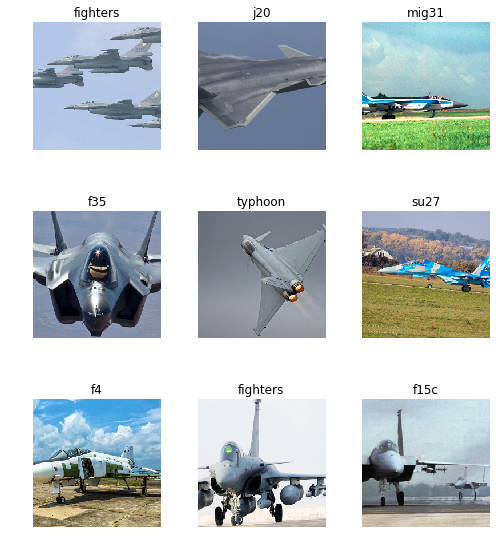

In [67]:
data.show_batch(rows=3, figsize=(7,8))

In [68]:
data.classes, data.c

(['a10',
  'cargo',
  'f14',
  'f15c',
  'f15e',
  'f16',
  'f22',
  'f35',
  'f4',
  'fa18c',
  'fa18ef',
  'fighters',
  'j20',
  'jas39',
  'mig21',
  'mig25',
  'mig29',
  'mig31',
  'rafale',
  'su22',
  'su24',
  'su25',
  'su27',
  'su30',
  'su34',
  'su57',
  'tornado',
  'typhoon'],
 28)

## Train model

In [69]:
learn = ConvLearner(data, models.resnet34, metrics=error_rate)

In [70]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate


Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.7/multiprocessing/connection.py", line 200, 

KeyboardInterrupt: 

In [ ]:
learn.fit_one_cycle(4)

Total time: 00:49
epoch  train_loss  valid_loss  error_rate
1      1.036307    0.318878    0.048611    (00:12)
2      0.552535    0.138572    0.055556    (00:12)
3      0.400240    0.166448    0.055556    (00:12)
4      0.309318    0.158356    0.062500    (00:12)



In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find(stop_div=False)

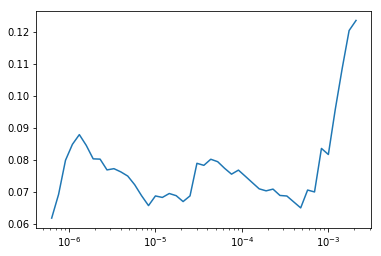

In [ ]:
learn.recorder.plot()

In [ ]:
learn.save('stage-1')

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

Total time: 00:25
epoch  train_loss  valid_loss  error_rate
1      0.096706    0.144553    0.055556    (00:11)
2      0.087185    0.146705    0.055556    (00:13)



In [ ]:
learn.save('stage-2')

## Interpretation

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

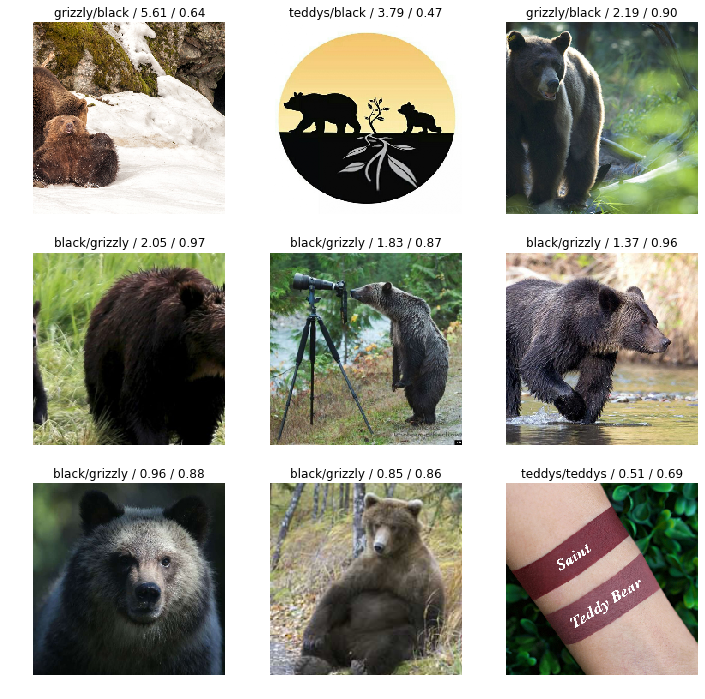

In [ ]:
interp.plot_top_losses(9)

In [ ]:
data.cl

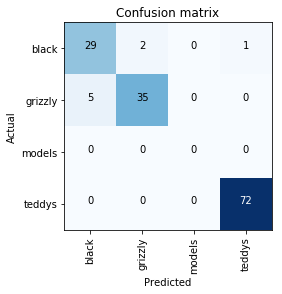

In [ ]:
interp.plot_confusion_matrix()

## Optional: Prune images